In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import fabs
from array import *

**Мультипликативный конгруэнтный метод:**


Псевдослучайная послеовательность x строится по следующим рекурентным формулам:

$x_{t}$ = $x_{t}^{*}/M$, $x_{t}^{*} = (β x_{t - 1}^{*}) \ mod \ M $  

β, $M$ , $a_{0}^{*}$ - параметры датчика
β -  множитель (β < $M$), 

$M$ – модуль,    

$a_{0}^{*}$ - стартовое значение (нечетное число).


В данной работе брались значения: $M=2^{31}$,  $a_{0}^{*} = β =131075$.

In [ ]:
def gen(bet, a_star_prev, M):
  a_star = bet * a_star_prev % M
  a = a_star / M
  return a, a_star

In [ ]:
n = 1000
k = 128
M = 2**31
bet = 131075
alpha = []
a_star = bet
for i in range(0, n):
  a_t, a_star = gen(bet, a_star, M)
  alpha.append(a_t)

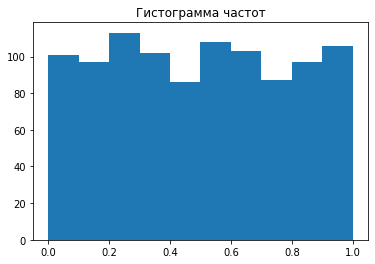

In [ ]:
plt.hist(alpha, bins=10);
plt.title("Гистограмма частот");

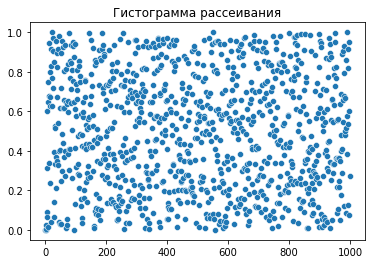

In [ ]:

sns.scatterplot(x = range(n), y = alpha);
plt.title("Гистограмма рассеивания");




**Метод Маклорена-Марсальи**:

Пусть  $\{b_{t}\}$, $\{c_{t}\}$ -  псевдослучайные последовательности, порожденные независимо работающими датчиками;  $\{x_{t}\}$ - результирующая псевдослучайная последовательность реализация БСВ; 
$V={V(0), V(1), …,V(K-1)}$ – вспомогательная таблица $K$ чисел. 
Процесс вычисления $\{x_{t}\}$   включает следующие этапы:
- первоначальное заполнение таблицы:
$V: V(i) = β_{i}, i = \overline {0, K - 1}$  
- случайный выбор из таблицы:

  $x_{t} = V(s), s = [c_{t} ⋅ K] $
-обновление табличных значений:
 $V(s) = b_{t + K}, t = 0, 1, 2, ...$

В данной работе в качестве  $\{β_{t}\}$ бралась последовательность (из 1000 элементов), полученная мультипликативным конгруэнтным методом, описанным выше. В качестве  $\{c_{t}\}$,  бралась последовательности (из N) элементов, полученная аналогичным способом с тем же $M$ и ${β'} = 3{β} + 1,  K=128$


In [ ]:
def MacLaren_Marsaglia(b, c, alpha, k, n):
  v = list(b[:k])
  for i in range(n):
    j = min(int(c[i] * k), k - 1)
    alpha.append(v[j])
    v[j] = b[(i + k) %n]

In [ ]:
b = list(alpha)
c = []
bet = bet * 3 + 1
c_star = bet
for i in range(10000):
  c_t, c_star = gen(bet, c_star, M) 
  c.append(c_t)
alpha_2 = []
MacLaren_Marsaglia(b, c, alpha_2, k, n)

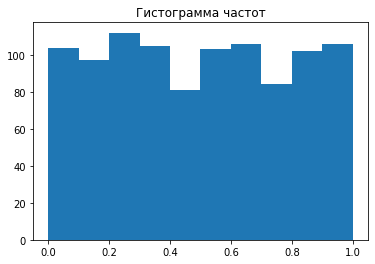

In [ ]:
plt.hist(alpha_2, bins=10);
plt.title("Гистограмма частот");

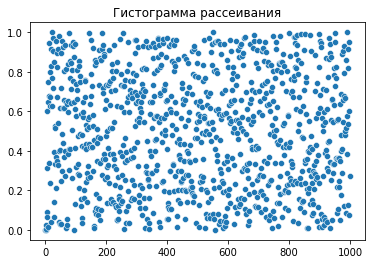

In [ ]:
sns.scatterplot(x = range(n), y = alpha);
plt.title("Гистограмма рассеивания");

In [ ]:
def Kolmogorov(b, n):
  D = 0
  b.sort()
  for i in range(0, n):
    D = max(D, fabs((i + 1)/n - b[i]))
  print("D = {} < 1.63".format(D))

In [ ]:
def Pirson(b, n, m):
  cnt = 0
  xi2 = 0
  i = 0
  b.sort()
  for j in range(1, m + 1):
    cnt = 0;
    while(i < n and b[i] < j/ m):
      i+=1
      cnt+=1
    xi2 += (cnt - n / m) * (cnt - n / m) / (n / m)
  print("xi2 = {} < 30.14 ".format(xi2))

**Проверка критерием Колмогорова и критерием Пирсона**

Мультипликативный конгруэнтный метод:

In [ ]:
print("Критерий Колмогорова\n")
Kolmogorov(alpha, n)

Критерий Колмогорова

D = 0.017537344824522738 < 1.63


In [ ]:
print(f"Критерий Пирсона\n")
Pirson(alpha, n, 10)

Критерий Пирсона

xi2 = 6.3999999999999995 < 30.14 


Метод Маклорена-Марсальи:

In [ ]:
print("Критерий Колмогорова\n")
Kolmogorov(alpha_2, n)

Критерий Колмогорова

D = 0.02153734482452274 < 1.63


In [ ]:
print(f"Критерий Пирсона\n")
Pirson(alpha_2, n, 10)

Критерий Пирсона

xi2 = 8.7 < 30.14 
